# Capstone Project Data Science (mdavap)
# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
import json

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# Import the dataset

In [2]:
df = pd.read_csv("../dataset/anime.csv")
df.head(5)

,id,title,title_english,type,source,episodes,status,airing,rating,score,...,popularity,favorites,members,synopsis,season,year,start,ending,studios,genres
0,1,Cowboy Bebop,Cowboy Bebop,TV,Original,26,Finished Airing,False,R - 17+ (violence & profanity),8.75,...,43,85049,1935105,"Crime is timeless. By the year 2071, humanity ...",spring,1998,1998-04-03,1999-04-24,Sunrise,Action;Award Winning;Sci-Fi
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,Movie,Original,1,Finished Airing,False,R - 17+ (violence & profanity),8.38,...,635,1661,390938,"Another day, another bounty—such is the life o...",NaN,2001,2001-09-01,NaN,Bones,Action;Sci-Fi
2,6,Trigun,Trigun,TV,Manga,26,Finished Airing,False,PG-13 - Teens 13 or older,8.22,...,259,16535,789238,"Vash the Stampede is the man with a $$60,000,0...",spring,1998,1998-04-01,1998-09-30,Madhouse,Action;Adventure;Sci-Fi
3,7,Witch Hunter Robin,Witch Hunter Robin,TV,Original,26,Finished Airing,False,PG-13 - Teens 13 or older,7.24,...,1921,658,120993,"Though hidden away from the general public, Wi...",summer,2002,2002-07-03,2002-12-25,Sunrise,Action;Drama;Mystery;Supernatural
4,8,Bouken Ou Beet,Beet the Vandel Buster,TV,Manga,52,Finished Airing,False,PG - Children,6.93,...,5557,16,16091,It is the dark century and the people are suff...,fall,2004,2004-09-30,2005-09-29,Toei Animation,Action;Adventure;Fantasy


In [3]:
df[df['rank'] == 1]

,id,title,title_english,type,source,episodes,status,airing,rating,score,...,popularity,favorites,members,synopsis,season,year,start,ending,studios,genres
23087,52991,Sousou no Frieren,Frieren: Beyond Journey's End,TV,Manga,28,Finished Airing,False,PG-13 - Teens 13 or older,9.31,...,171,60283,995965,During their decade-long quest to defeat the D...,fall,2023,2023-09-29,2024-03-22,Madhouse,Adventure;Drama;Fantasy


# Classification
- Create `success`
    - 0: `Not successful`
    - 1: `Successful` with Criteria below:
        - Top 500 at `rank`
        - Top 500 at `popularity`
        - Score is or above `7.5` 

In [4]:
def DecideSuccess(anime):
    return anime['rank'] <= 500 or anime['popularity'] <= 500 or anime['score'] >= 7.5

df['success'] = df.apply(DecideSuccess, axis=1)

In [5]:
df.head(5)

,id,title,title_english,type,source,episodes,status,airing,rating,score,...,favorites,members,synopsis,season,year,start,ending,studios,genres,success
0,1,Cowboy Bebop,Cowboy Bebop,TV,Original,26,Finished Airing,False,R - 17+ (violence & profanity),8.75,...,85049,1935105,"Crime is timeless. By the year 2071, humanity ...",spring,1998,1998-04-03,1999-04-24,Sunrise,Action;Award Winning;Sci-Fi,True
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,Movie,Original,1,Finished Airing,False,R - 17+ (violence & profanity),8.38,...,1661,390938,"Another day, another bounty—such is the life o...",NaN,2001,2001-09-01,NaN,Bones,Action;Sci-Fi,True
2,6,Trigun,Trigun,TV,Manga,26,Finished Airing,False,PG-13 - Teens 13 or older,8.22,...,16535,789238,"Vash the Stampede is the man with a $$60,000,0...",spring,1998,1998-04-01,1998-09-30,Madhouse,Action;Adventure;Sci-Fi,True
3,7,Witch Hunter Robin,Witch Hunter Robin,TV,Original,26,Finished Airing,False,PG-13 - Teens 13 or older,7.24,...,658,120993,"Though hidden away from the general public, Wi...",summer,2002,2002-07-03,2002-12-25,Sunrise,Action;Drama;Mystery;Supernatural,False
4,8,Bouken Ou Beet,Beet the Vandel Buster,TV,Manga,52,Finished Airing,False,PG - Children,6.93,...,16,16091,It is the dark century and the people are suff...,fall,2004,2004-09-30,2005-09-29,Toei Animation,Action;Adventure;Fantasy,False


In [6]:
print(f"Number of successful anime: {len(df[df['success'] == True]['success'])}")
print(f"Number of not successful anime: {len(df[df['success'] == False]['success'])}")

Number of successful anime: 2179
Number of not successful anime: 25791


# Preprocessing

## One hot encoding for genres and studios

In [7]:
df_encoded = df.join(df['genres'].str.get_dummies(sep=';')).join(df['studios'].str.get_dummies(sep=';'))

In [8]:
df_encoded.head(5)

,id,title,title_english,type,source,episodes,status,airing,rating,score,...,studio NAGURI,studio YOG,studio hb,studio2 Animation Lab,team Yamahitsuji,teamKG,trenova,ufotable,uzupiyo Animation & Digital Works,yell
0,1,Cowboy Bebop,Cowboy Bebop,TV,Original,26,Finished Airing,False,R - 17+ (violence & profanity),8.75,...,0,0,0,0,0,0,0,0,0,0
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,Movie,Original,1,Finished Airing,False,R - 17+ (violence & profanity),8.38,...,0,0,0,0,0,0,0,0,0,0
2,6,Trigun,Trigun,TV,Manga,26,Finished Airing,False,PG-13 - Teens 13 or older,8.22,...,0,0,0,0,0,0,0,0,0,0
3,7,Witch Hunter Robin,Witch Hunter Robin,TV,Original,26,Finished Airing,False,PG-13 - Teens 13 or older,7.24,...,0,0,0,0,0,0,0,0,0,0
4,8,Bouken Ou Beet,Beet the Vandel Buster,TV,Manga,52,Finished Airing,False,PG - Children,6.93,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27970 entries, 0 to 27969
Columns: 1254 entries, id to yell
dtypes: bool(2), float64(1), int64(1239), object(12)
memory usage: 267.2+ MB


In [10]:
df_encoded['airing'] = df_encoded['airing'].apply(lambda x: 1 if x else 0)
df_encoded.head(5)

,id,title,title_english,type,source,episodes,status,airing,rating,score,...,studio NAGURI,studio YOG,studio hb,studio2 Animation Lab,team Yamahitsuji,teamKG,trenova,ufotable,uzupiyo Animation & Digital Works,yell
0,1,Cowboy Bebop,Cowboy Bebop,TV,Original,26,Finished Airing,0,R - 17+ (violence & profanity),8.75,...,0,0,0,0,0,0,0,0,0,0
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,Movie,Original,1,Finished Airing,0,R - 17+ (violence & profanity),8.38,...,0,0,0,0,0,0,0,0,0,0
2,6,Trigun,Trigun,TV,Manga,26,Finished Airing,0,PG-13 - Teens 13 or older,8.22,...,0,0,0,0,0,0,0,0,0,0
3,7,Witch Hunter Robin,Witch Hunter Robin,TV,Original,26,Finished Airing,0,PG-13 - Teens 13 or older,7.24,...,0,0,0,0,0,0,0,0,0,0
4,8,Bouken Ou Beet,Beet the Vandel Buster,TV,Manga,52,Finished Airing,0,PG - Children,6.93,...,0,0,0,0,0,0,0,0,0,0


## Label encoding
- `status`
- `type`
- `source`
- `rating`
- `season`

In [11]:
df_encoded['status'].value_counts()

status
Finished Airing     27034
Not yet aired         544
Currently Airing      392
Name: count, dtype: int64

In [12]:
df_encoded['type'].value_counts()

type
TV            8203
Movie         4766
OVA           4157
ONA           3861
Music         3731
Special       1769
TV Special     737
CM             434
PV             231
unknown         81
Name: count, dtype: int64

In [13]:
df_encoded['source'].value_counts()

source
Original        11786
Manga            5396
Unknown          2854
Game             1413
Other            1253
Visual novel     1153
Light novel      1151
Novel             805
Web manga         606
4-koma manga      330
Picture book      269
Music             261
Mixed media       223
Book              217
Web novel         163
Card game          76
Radio              14
Name: count, dtype: int64

In [14]:
df_encoded['rating'].value_counts()

rating
PG-13 - Teens 13 or older         9984
G - All Ages                      8761
PG - Children                     4327
Rx - Hentai                       1553
R - 17+ (violence & profanity)    1551
R+ - Mild Nudity                  1197
no_rating                          597
Name: count, dtype: int64

In [15]:
df_encoded['season'].value_counts()

season
spring    1929
fall      1750
winter    1263
summer    1095
Name: count, dtype: int64

In [16]:
status_encoder = LabelEncoder()
type_encoder = LabelEncoder()
source_encoder = LabelEncoder()
rating_encoder = LabelEncoder()
season_encoder = LabelEncoder()


df_encoded['status'] = status_encoder.fit_transform(df_encoded['status'])
df_encoded['type'] = type_encoder.fit_transform(df_encoded['type'])
df_encoded['source'] = source_encoder.fit_transform(df_encoded['source'])
df_encoded['rating'] = rating_encoder.fit_transform(df_encoded['rating'])
df_encoded['season'] = rating_encoder.fit_transform(df_encoded['season'])

In [17]:
df_encoded.sample(1)

,id,title,title_english,type,source,episodes,status,airing,rating,score,...,studio NAGURI,studio YOG,studio hb,studio2 Animation Lab,team Yamahitsuji,teamKG,trenova,ufotable,uzupiyo Animation & Digital Works,yell
16715,41802,Wan Jie Chun Qiu,Spring and Autumn,3,9,56,1,0,2,6.39,...,0,0,0,0,0,0,0,0,0,0


## Drop useless column

In [18]:
df_encoded = df_encoded.drop(['id', 'title', 'title_english', 'synopsis', 'start', 'ending', 'studios', 'genres'], axis=1) # studios and genres were hot encoded
df_encoded.sample(1)

,type,source,episodes,status,airing,rating,score,rank,scored_by,popularity,...,studio NAGURI,studio YOG,studio hb,studio2 Animation Lab,team Yamahitsuji,teamKG,trenova,ufotable,uzupiyo Animation & Digital Works,yell
24385,2,9,1,1,0,0,0.0,32580,0,22983,...,0,0,0,0,0,0,0,0,0,0


## Split dataset for Training and Testing

In [19]:
X = df_encoded.drop('success', axis=1)
y = df_encoded['success']

# Split the Dataset into Train and Test with test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Modeling

In [20]:
# Try every classifiers because why not? :)
model_classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=99),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=99),
    'Decision Tree': DecisionTreeClassifier(random_state=44),
    'Random Forest': RandomForestClassifier(n_estimators=120, random_state=88),
    'Gradient Boosting': GradientBoostingClassifier(random_state=99),
    'Naive Bayes': MultinomialNB(),
    'Multi-Layer Perceptron': MLPClassifier(max_iter=1000, random_state=99),
    'AdaBoost': AdaBoostClassifier(random_state=99),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Extra Trees': ExtraTreesClassifier(random_state=99),
    'Stochastic Gradient Descent': SGDClassifier(random_state=99),
    'Bagging Classifier': BaggingClassifier(random_state=99)
}

In [21]:
model_evaluations = {}

for model_name, model in model_classifiers.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    model_evaluations[model_name] = {
        'accuracy': accuracy_score(y_test, predictions),
        'precision': precision_score(y_test, predictions),
        'recall': recall_score(y_test, predictions),
        'confusion_matrix': confusion_matrix(y_test, predictions)
    }
    print(f'{model_name} Has finished training and evaluated!')

Logistic Regression Has finished training and evaluated!
K-Nearest Neighbors Has finished training and evaluated!
Support Vector Machine Has finished training and evaluated!
Decision Tree Has finished training and evaluated!
Random Forest Has finished training and evaluated!
Gradient Boosting Has finished training and evaluated!
Naive Bayes Has finished training and evaluated!
Multi-Layer Perceptron Has finished training and evaluated!
AdaBoost Has finished training and evaluated!
Linear Discriminant Analysis Has finished training and evaluated!
Quadratic Discriminant Analysis Has finished training and evaluated!
Extra Trees Has finished training and evaluated!
Stochastic Gradient Descent Has finished training and evaluated!
Bagging Classifier Has finished training and evaluated!


# Evaluation

In [22]:
model_evaluations_values = model_evaluations.values()
accuracy_df = pd.DataFrame({
    'Model': list(model_evaluations.keys()),
    'Accuracy': [metrics['accuracy'] for metrics in model_evaluations_values]
}).sort_values('Accuracy', ascending=True)

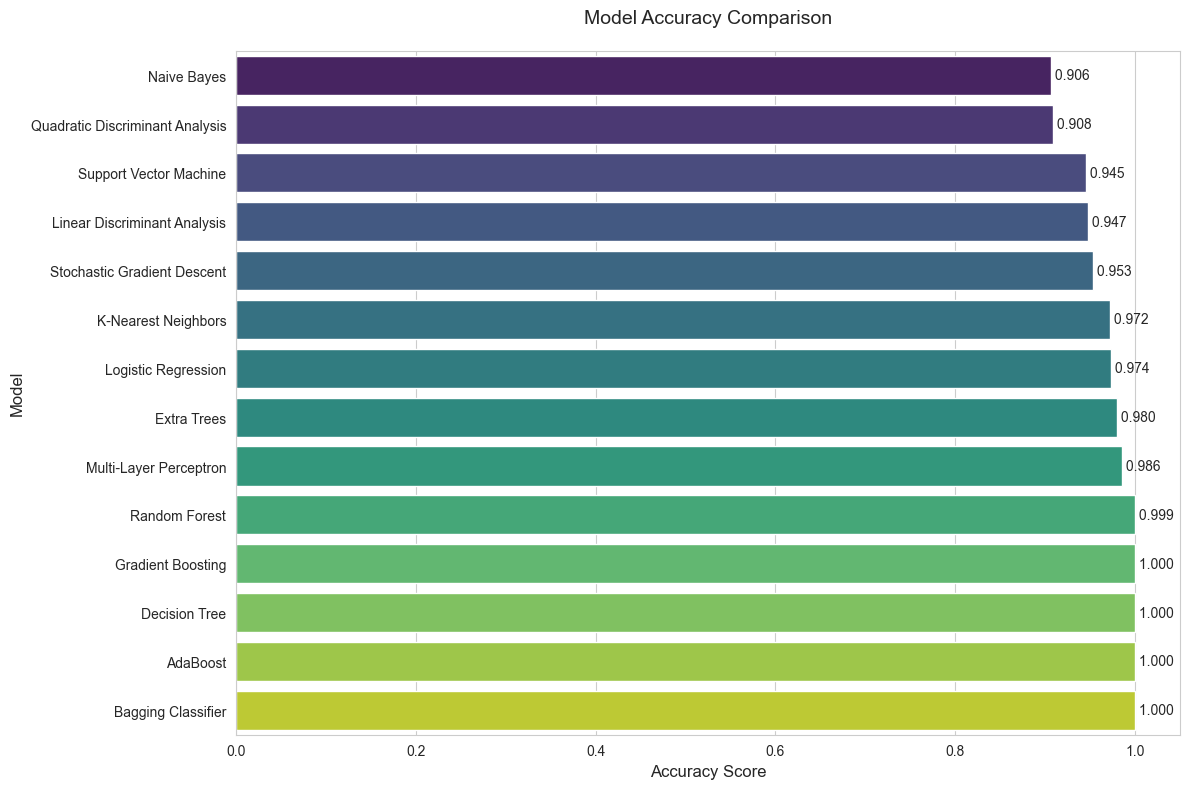

In [23]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(data=accuracy_df, y='Model', x='Accuracy', palette='viridis')

plt.title('Model Accuracy Comparison', pad=20, fontsize=14)
plt.xlabel('Accuracy Score', fontsize=12)
plt.ylabel('Model', fontsize=12)

for i, v in enumerate(accuracy_df['Accuracy']):
    plt.text(v, i, f' {v:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

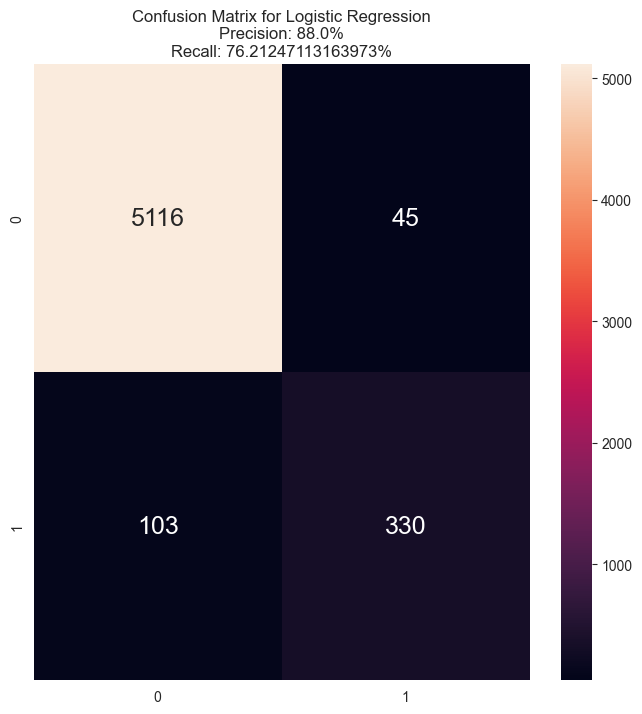

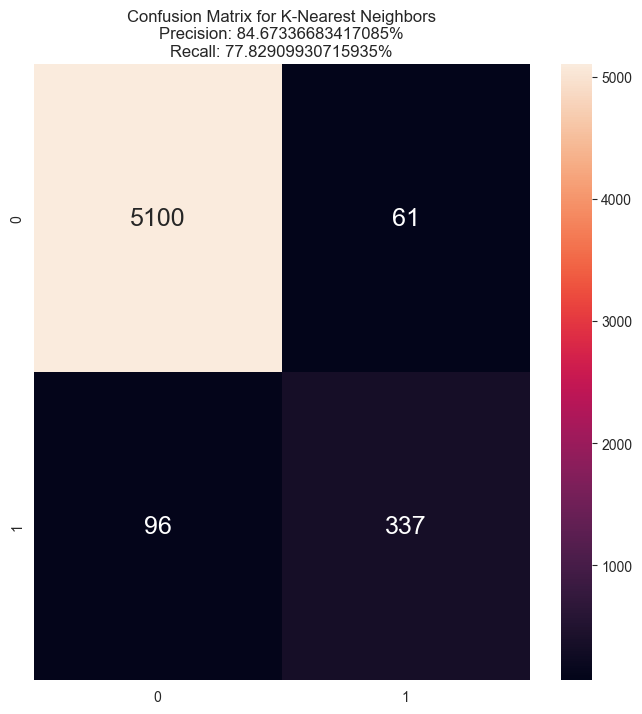

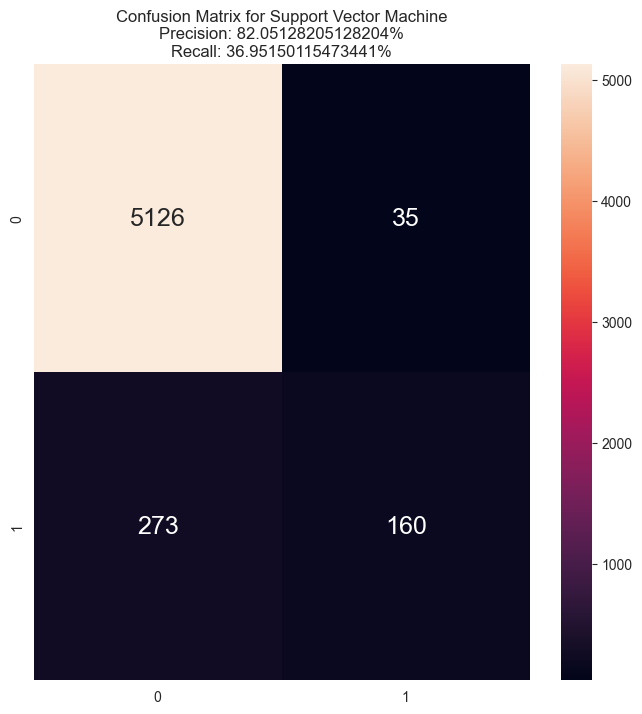

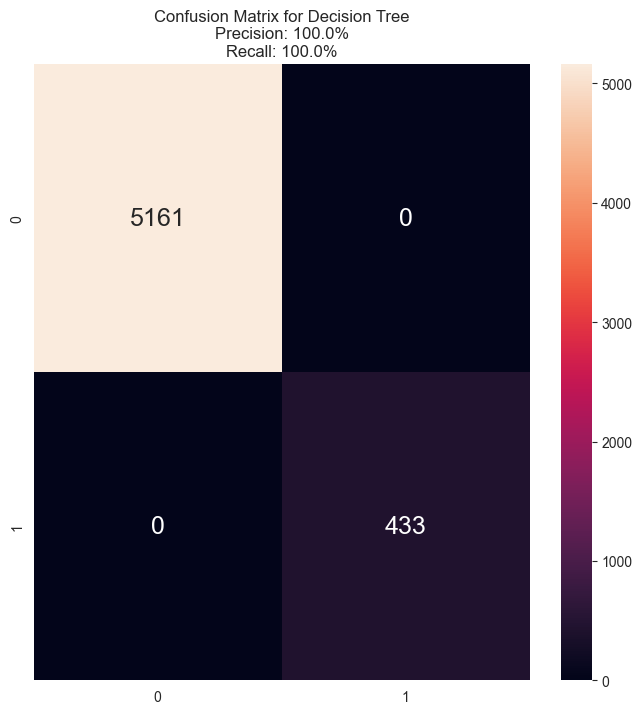

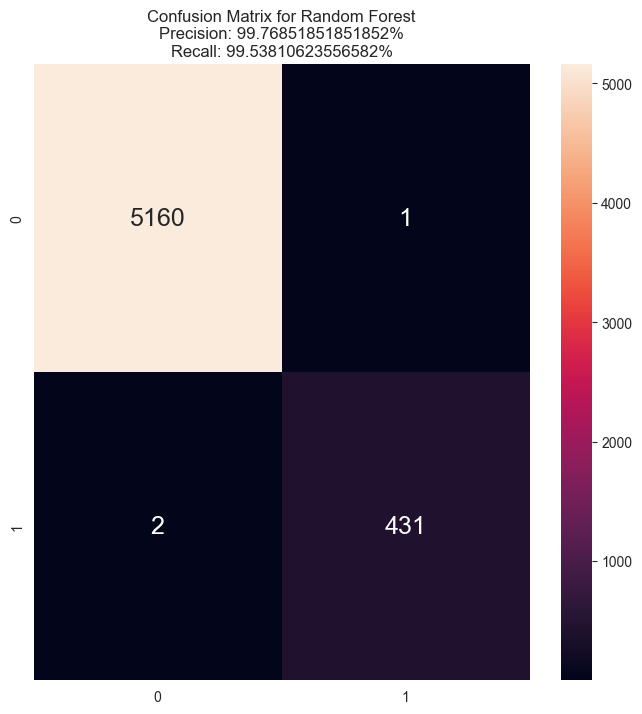

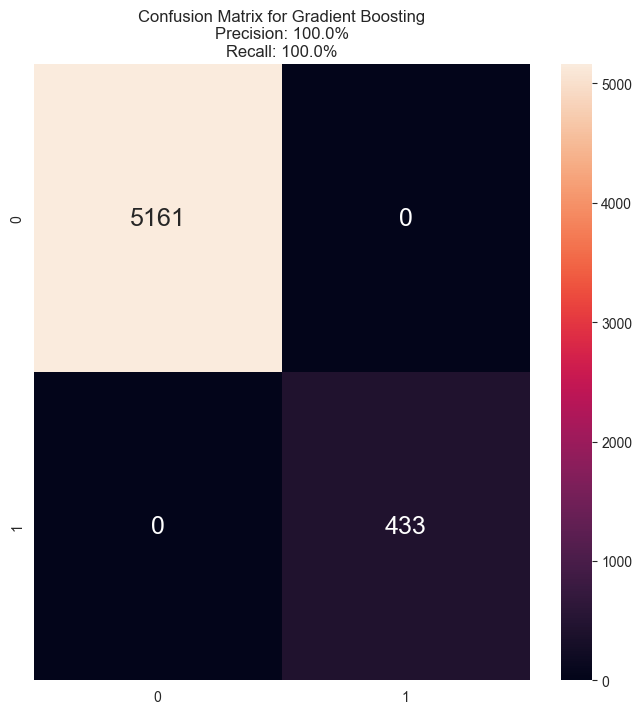

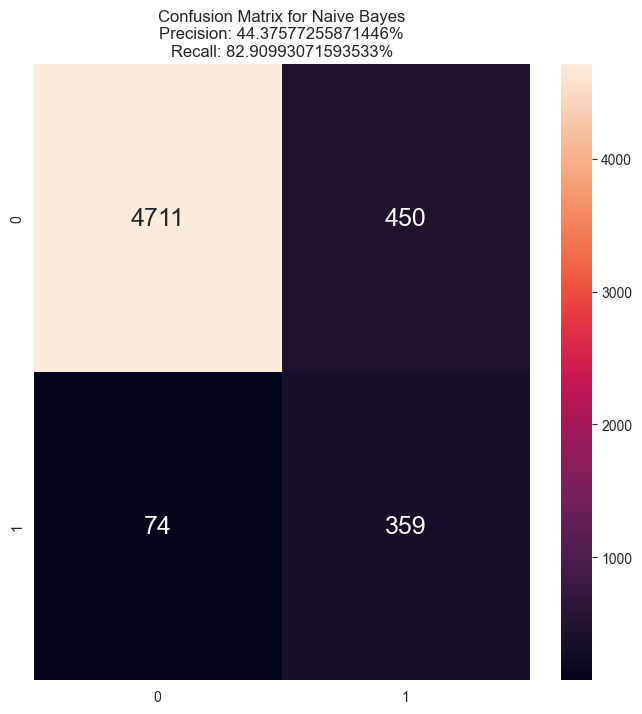

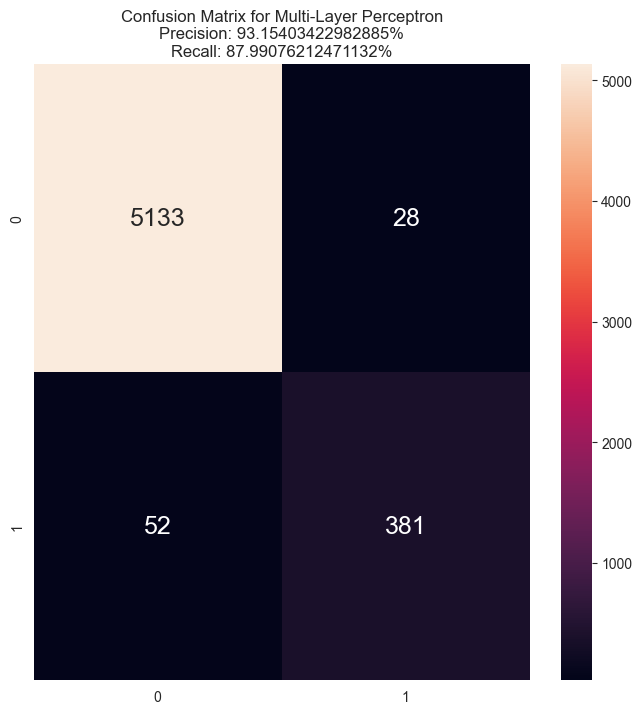

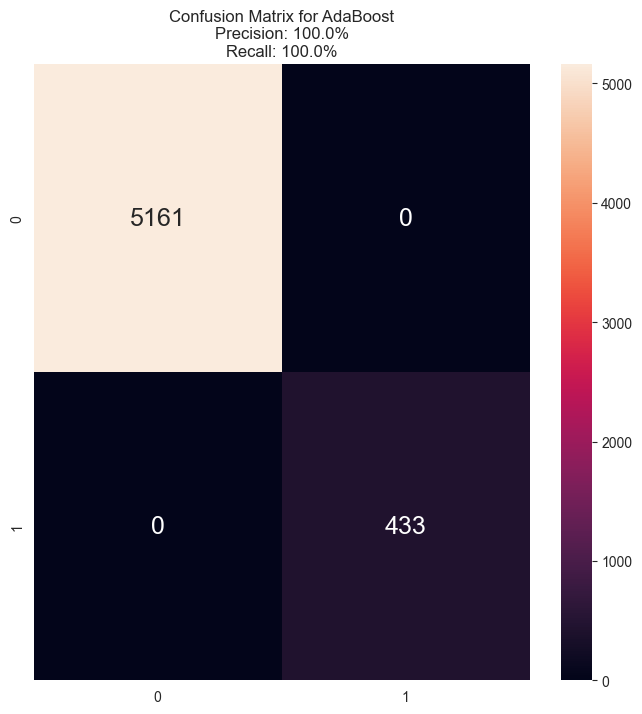

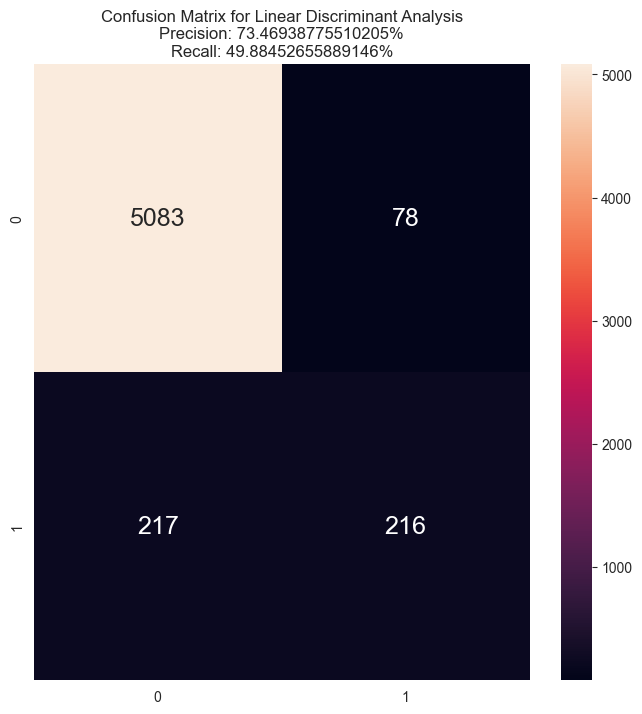

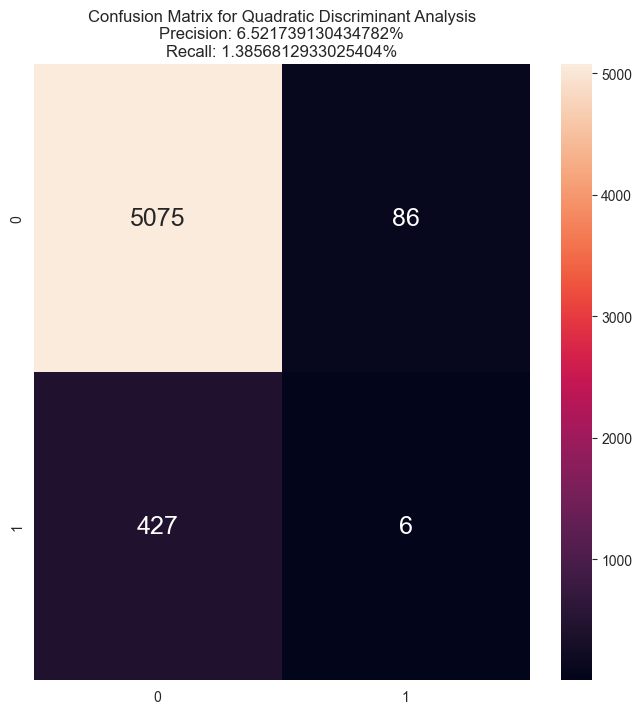

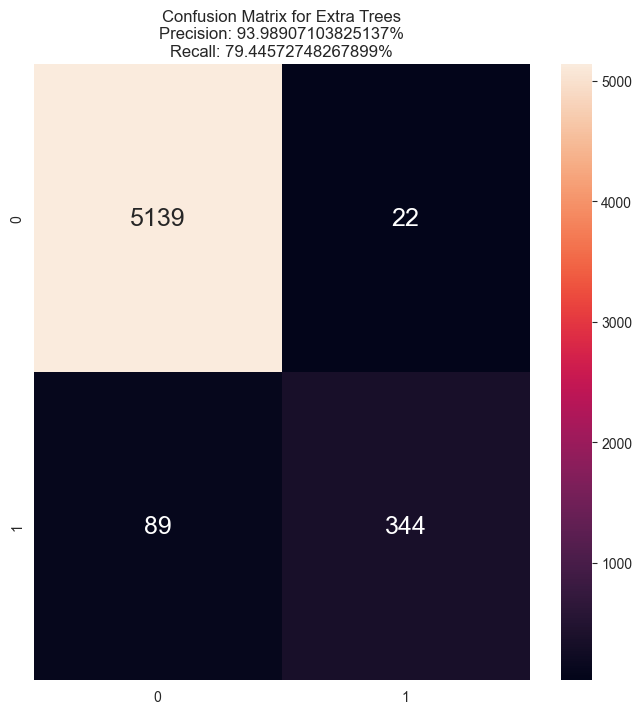

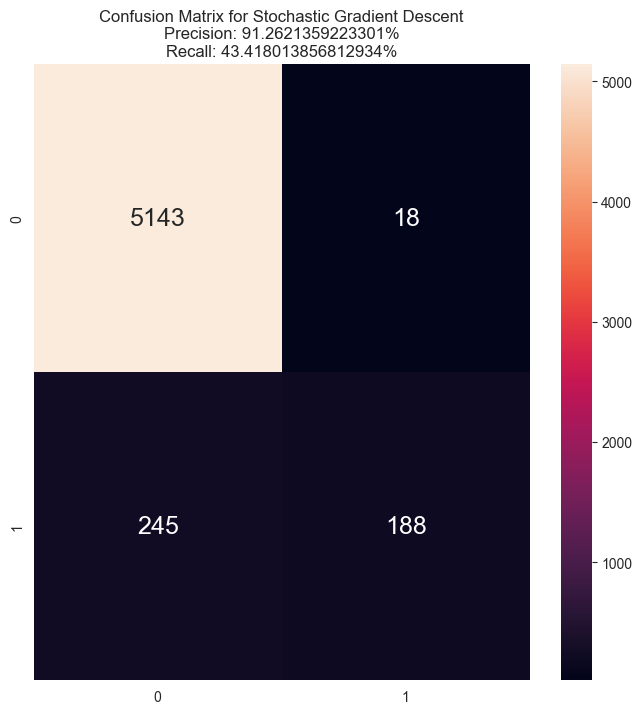

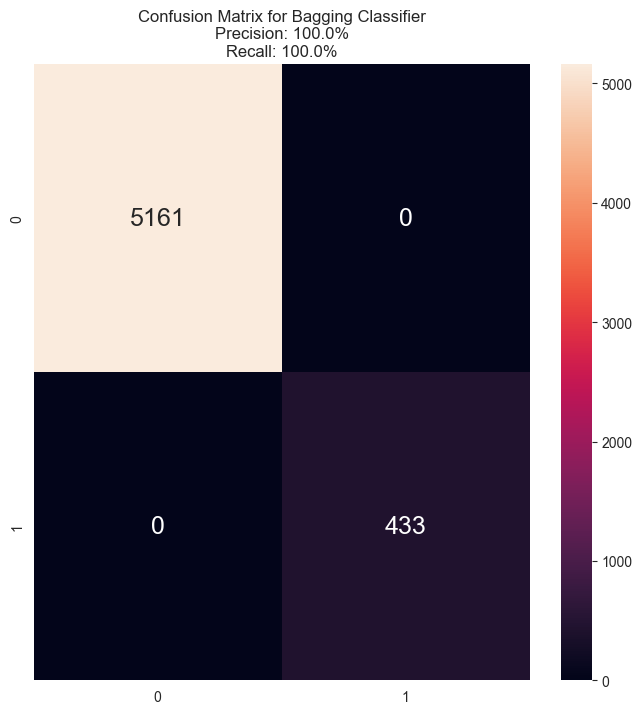

In [25]:
def PrintModelEvaluation(model, evaluation):
    matrix = evaluation['confusion_matrix']
    precision = evaluation['precision'] * 100
    recall = evaluation['recall'] * 100

    plt.figure(figsize=(8, 8))
    sns.heatmap(matrix, 
               annot = True, 
               fmt=".0f", 
               annot_kws={"size": 18}).set(title=f"Confusion Matrix for {model}\nPrecision: {precision}%\nRecall: {recall}%")
    plt.show()

for model_name, evaluation in model_evaluations.items():
    PrintModelEvaluation(model_name, evaluation) 

# Save the best model
- We choose Decision Tree with 100% accuracy, precision, recall and the lightweight design

In [28]:
base_path = '../model/classification/'

In [29]:
decision_tree = model_classifiers['Decision Tree']
joblib.dump(decision_tree, f'{base_path}decision_tree.joblib')
print(f'Decision tree has been saved to disk!')

Decision tree has been saved to disk!


## Dont forget save the label encoder and column order

In [30]:
joblib.dump(status_encoder, f'{base_path}status_encoder.joblib')
joblib.dump(type_encoder, f'{base_path}type_encoder.joblib')
joblib.dump(source_encoder, f'{base_path}source_encoder.joblib')
joblib.dump(rating_encoder, f'{base_path}rating_encoder.joblib')
joblib.dump(season_encoder, f'{base_path}season_encoder.joblib')
print(f'All label encoder has been saved to disk!')

All label encoder has been saved to disk!


In [42]:
with open(f'{base_path}columns.json', 'w', encoding='utf-8') as out:
    json.dump(list(X.columns.values), out, indent=4)

print(f'Column order has been saved to disk!')

Column order has been saved to disk!
